In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 256

In [3]:
file_name_initials = 'wheat_30_var_2_species'
file_name = file_name_initials+".csv"

def dir(file_name):
    return '../data/'+file_name

In [9]:
from enum import Enum

class filter_method(Enum):
    none = 0
    snv = 1
    msc = 2
    savgol = 3

FILT = 1
FILTER = filter_method(FILT).name

# to be set if filter chosen is savgol
WINDOW = 7
ORDER = 2
DERIVATIVE = 1

#will be used for test dataset in msc
reference= None

In [10]:
def dataset_file_name(file_name):
    name = "./dataset/"+str(file_name)
    if FILT != 0:
        name+="_FILTER_"+str(FILTER)
    if FILTER == "savgol":
        name+="_WINDOW_"+str(WINDOW)+"_ORDER_"+str(ORDER)+"_DERIVATIVE_"+str(DERIVATIVE)
    return name

In [13]:
def load_dataset(file_name):
    DATASET_FILE_NAME = dataset_file_name(file_name)
    X_train = np.load(DATASET_FILE_NAME+"_train_dataset.npy")
    y_train = np.load(DATASET_FILE_NAME+"_train_dataset_label.npy")
    X_test = np.load(DATASET_FILE_NAME+"_test_dataset.npy")
    y_test = np.load(DATASET_FILE_NAME+"_test_dataset_label.npy")
    
    return (X_train, y_train, X_test, y_test)

In [20]:
(X_train, y_train, X_test, y_test) = load_dataset(file_name_initials)

In [31]:
y_set = set(np.concatenate((y_train, y_test), axis =0))

In [32]:
NUM_OF_CLASSES = len(y_set)

In [34]:
NUM_OF_CLASSES

2

In [35]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)

(48384, 147, 1)
(12096, 147, 1)


In [36]:
import keras
from keras import Sequential
from keras.layers import Input, Conv1D, Flatten, Dense, MaxPooling1D

In [37]:
def createModel(input_shape,num_classes):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=5, input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=5))
    model.add(Conv1D(filters=64, kernel_size=5))
    model.add(MaxPooling1D(pool_size=5))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(800, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    
    return model

In [38]:
model = createModel(X_train.shape[1:],NUM_OF_CLASSES)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 143, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 28, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1000)              2

In [40]:
train_eva = []
test_eva = []

In [41]:
history_dataframe = pd.DataFrame() 

In [42]:
from IPython.display import clear_output

for x in range(400):
    print("\nEpoch: ",x+1)
    history = model.fit(X_train ,y_train ,batch_size=BATCH_SIZE ,epochs=1, verbose=2, shuffle=True, validation_split = 0.33)
    if history_dataframe.size == 0:
        history_dataframe = pd.DataFrame.from_dict(history.history)
    else:
        history_dataframe = pd.concat([history_dataframe,pd.DataFrame.from_dict(history.history)],axis=0,ignore_index=True)
    
    print("for training")
    train_eva.append(model.evaluate(X_train,y_train))
    print("for testing")
    test_eva.append(model.evaluate(X_test, y_test))


Epoch:  1
127/127 - 7s - loss: 0.6376 - accuracy: 0.6236 - val_loss: 0.6379 - val_accuracy: 0.6427 - 7s/epoch - 55ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.6407 - accuracy: 0.6414
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.6361 - accuracy: 0.6426

Epoch:  2
127/127 - 6s - loss: 0.5651 - accuracy: 0.7136 - val_loss: 0.5089 - val_accuracy: 0.7573 - 6s/epoch - 46ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.5113 - accuracy: 0.7546
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.5105 - accuracy: 0.7542

Epoch:  3
127/127 - 6s - loss: 0.4658 - accuracy: 0.7788 - val_loss: 0.3797 - val_accuracy: 0.8253 - 6s/epoch - 47ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.3833 - accuracy: 0.8213
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.3848 - accuracy: 0.8189

Epoch:  4
127/1

378/378 [==============================] - 2s 5ms/step - loss: 0.2278 - accuracy: 0.9064

Epoch:  26
127/127 - 6s - loss: 0.1637 - accuracy: 0.9314 - val_loss: 0.1929 - val_accuracy: 0.9186 - 6s/epoch - 46ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.1934 - accuracy: 0.9179
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.1964 - accuracy: 0.9171

Epoch:  27
127/127 - 6s - loss: 0.1433 - accuracy: 0.9416 - val_loss: 0.1465 - val_accuracy: 0.9389 - 6s/epoch - 45ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.1471 - accuracy: 0.9385
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.1498 - accuracy: 0.9393

Epoch:  28
127/127 - 6s - loss: 0.1428 - accuracy: 0.9416 - val_loss: 0.1442 - val_accuracy: 0.9413 - 6s/epoch - 44ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.1479 - accuracy: 0.9395
for testing
378/378 [====

1512/1512 [==============================] - 7s 5ms/step - loss: 0.0945 - accuracy: 0.9633
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0958 - accuracy: 0.9611

Epoch:  51
127/127 - 6s - loss: 0.1062 - accuracy: 0.9569 - val_loss: 0.1060 - val_accuracy: 0.9583 - 6s/epoch - 44ms/step
for training
1512/1512 [==============================] - 7s 4ms/step - loss: 0.1065 - accuracy: 0.9574
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.1087 - accuracy: 0.9558

Epoch:  52
127/127 - 6s - loss: 0.1045 - accuracy: 0.9585 - val_loss: 0.1035 - val_accuracy: 0.9595 - 6s/epoch - 44ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.1029 - accuracy: 0.9592
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.1074 - accuracy: 0.9563

Epoch:  53
127/127 - 6s - loss: 0.1003 - accuracy: 0.9593 - val_loss: 0.1047 - val_accuracy: 0.9587 - 6s/epoch - 45ms/step
for training
1512/1512 [==

for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0707 - accuracy: 0.9729
for testing
378/378 [==============================] - 3s 7ms/step - loss: 0.0726 - accuracy: 0.9727

Epoch:  76
127/127 - 8s - loss: 0.0922 - accuracy: 0.9632 - val_loss: 0.0781 - val_accuracy: 0.9706 - 8s/epoch - 61ms/step
for training
1512/1512 [==============================] - 12s 8ms/step - loss: 0.0753 - accuracy: 0.9719
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0770 - accuracy: 0.9717

Epoch:  77
127/127 - 7s - loss: 0.0789 - accuracy: 0.9700 - val_loss: 0.0683 - val_accuracy: 0.9737 - 7s/epoch - 57ms/step
for training
1512/1512 [==============================] - 10s 6ms/step - loss: 0.0658 - accuracy: 0.9755
for testing
378/378 [==============================] - 3s 7ms/step - loss: 0.0674 - accuracy: 0.9749

Epoch:  78
127/127 - 6s - loss: 0.0810 - accuracy: 0.9684 - val_loss: 0.0706 - val_accuracy: 0.9736 - 6s/epoch - 47ms/step
for trainin

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0744 - accuracy: 0.9714
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0773 - accuracy: 0.9679

Epoch:  101
127/127 - 6s - loss: 0.0670 - accuracy: 0.9744 - val_loss: 0.0896 - val_accuracy: 0.9660 - 6s/epoch - 45ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0803 - accuracy: 0.9686
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0895 - accuracy: 0.9645

Epoch:  102
127/127 - 6s - loss: 0.0618 - accuracy: 0.9767 - val_loss: 0.0569 - val_accuracy: 0.9796 - 6s/epoch - 44ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0518 - accuracy: 0.9812
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9776

Epoch:  103
127/127 - 6s - loss: 0.0624 - accuracy: 0.9762 - val_loss: 0.0821 - val_accuracy: 0.9675 - 6s/epoch - 50ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0563 - accuracy: 0.9800
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0634 - accuracy: 0.9764

Epoch:  126
127/127 - 6s - loss: 0.0498 - accuracy: 0.9813 - val_loss: 0.0596 - val_accuracy: 0.9779 - 6s/epoch - 45ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0532 - accuracy: 0.9793
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0624 - accuracy: 0.9749

Epoch:  127
127/127 - 6s - loss: 0.0478 - accuracy: 0.9822 - val_loss: 0.0541 - val_accuracy: 0.9803 - 6s/epoch - 45ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0479 - accuracy: 0.9826
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9792

Epoch:  128
127/127 - 6s - loss: 0.0529 - accuracy: 0.9798 - val_loss: 0.0486 - val_accuracy: 0.9830 - 6s/epoch - 45ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0406 - accuracy: 0.9853
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0491 - accuracy: 0.9823

Epoch:  151
127/127 - 6s - loss: 0.0480 - accuracy: 0.9823 - val_loss: 0.0582 - val_accuracy: 0.9777 - 6s/epoch - 48ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0487 - accuracy: 0.9816
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9780

Epoch:  152
127/127 - 6s - loss: 0.0485 - accuracy: 0.9816 - val_loss: 0.0615 - val_accuracy: 0.9772 - 6s/epoch - 45ms/step
for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0501 - accuracy: 0.9808
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0577 - accuracy: 0.9792

Epoch:  153
127/127 - 9s - loss: 0.0387 - accuracy: 0.9854 - val_loss: 0.0453 - val_accuracy: 0.9839 - 9s/epoch - 72ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0313 - accuracy: 0.9886
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0414 - accuracy: 0.9847

Epoch:  176
127/127 - 6s - loss: 0.0282 - accuracy: 0.9899 - val_loss: 0.0395 - val_accuracy: 0.9857 - 6s/epoch - 46ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0301 - accuracy: 0.9890
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0446 - accuracy: 0.9840

Epoch:  177
127/127 - 6s - loss: 0.0308 - accuracy: 0.9889 - val_loss: 0.0511 - val_accuracy: 0.9810 - 6s/epoch - 47ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0410 - accuracy: 0.9847
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0542 - accuracy: 0.9799

Epoch:  178
127/127 - 6s - loss: 0.0385 - accuracy: 0.9849 - val_loss: 0.0502 - val_accuracy: 0.9821 - 6s/epoch - 46ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0301 - accuracy: 0.9886
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0460 - accuracy: 0.9831

Epoch:  201
127/127 - 6s - loss: 0.0262 - accuracy: 0.9905 - val_loss: 0.0458 - val_accuracy: 0.9842 - 6s/epoch - 46ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0358 - accuracy: 0.9875
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0509 - accuracy: 0.9823

Epoch:  202
127/127 - 6s - loss: 0.0244 - accuracy: 0.9907 - val_loss: 0.0365 - val_accuracy: 0.9866 - 6s/epoch - 47ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0254 - accuracy: 0.9910
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0383 - accuracy: 0.9857

Epoch:  203
127/127 - 6s - loss: 0.0260 - accuracy: 0.9902 - val_loss: 0.0360 - val_accuracy: 0.9868 - 6s/epoch - 47ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0250 - accuracy: 0.9910
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9850

Epoch:  226
127/127 - 6s - loss: 0.0208 - accuracy: 0.9921 - val_loss: 0.0303 - val_accuracy: 0.9890 - 6s/epoch - 47ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0183 - accuracy: 0.9938
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0327 - accuracy: 0.9877

Epoch:  227
127/127 - 6s - loss: 0.0277 - accuracy: 0.9894 - val_loss: 0.0423 - val_accuracy: 0.9842 - 6s/epoch - 47ms/step
for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0337 - accuracy: 0.9862
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0485 - accuracy: 0.9822

Epoch:  228
127/127 - 6s - loss: 0.0255 - accuracy: 0.9903 - val_loss: 0.0357 - val_accuracy: 0.9876 - 6s/epoch - 48ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0204 - accuracy: 0.9922
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0393 - accuracy: 0.9860

Epoch:  251
127/127 - 6s - loss: 0.0308 - accuracy: 0.9890 - val_loss: 0.0333 - val_accuracy: 0.9886 - 6s/epoch - 48ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0206 - accuracy: 0.9927
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9873

Epoch:  252
127/127 - 6s - loss: 0.0153 - accuracy: 0.9944 - val_loss: 0.0322 - val_accuracy: 0.9887 - 6s/epoch - 48ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0195 - accuracy: 0.9928
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9869

Epoch:  253
127/127 - 6s - loss: 0.0154 - accuracy: 0.9944 - val_loss: 0.0411 - val_accuracy: 0.9862 - 6s/epoch - 47ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0409 - accuracy: 0.9844
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0647 - accuracy: 0.9767

Epoch:  276
127/127 - 6s - loss: 0.0173 - accuracy: 0.9932 - val_loss: 0.0326 - val_accuracy: 0.9889 - 6s/epoch - 50ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0189 - accuracy: 0.9933
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0358 - accuracy: 0.9873

Epoch:  277
127/127 - 6s - loss: 0.0136 - accuracy: 0.9951 - val_loss: 0.0844 - val_accuracy: 0.9750 - 6s/epoch - 48ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0581 - accuracy: 0.9803
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0793 - accuracy: 0.9758

Epoch:  278
127/127 - 6s - loss: 0.0429 - accuracy: 0.9840 - val_loss: 0.0472 - val_accuracy: 0.9844 - 6s/epoch - 48ms/step
for traini

for training
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0202 - accuracy: 0.9928
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0442 - accuracy: 0.9859

Epoch:  301
127/127 - 6s - loss: 0.0150 - accuracy: 0.9942 - val_loss: 0.0396 - val_accuracy: 0.9872 - 6s/epoch - 48ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0227 - accuracy: 0.9921
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0522 - accuracy: 0.9844

Epoch:  302
127/127 - 6s - loss: 0.0130 - accuracy: 0.9947 - val_loss: 0.0313 - val_accuracy: 0.9898 - 6s/epoch - 49ms/step
for training
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0150 - accuracy: 0.9951
for testing
378/378 [==============================] - 2s 5ms/step - loss: 0.0342 - accuracy: 0.9891

Epoch:  303
127/127 - 6s - loss: 0.0138 - accuracy: 0.9943 - val_loss: 0.0265 - val_accuracy: 0.9908 - 6s/epoch - 48ms/step
for traini

for training
1512/1512 [==============================] - 15s 10ms/step - loss: 0.0207 - accuracy: 0.9925
for testing
378/378 [==============================] - 4s 10ms/step - loss: 0.0414 - accuracy: 0.9868

Epoch:  326
127/127 - 10s - loss: 0.0244 - accuracy: 0.9908 - val_loss: 0.0318 - val_accuracy: 0.9897 - 10s/epoch - 76ms/step
for training
1512/1512 [==============================] - 15s 10ms/step - loss: 0.0170 - accuracy: 0.9944
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0376 - accuracy: 0.9871

Epoch:  327
127/127 - 10s - loss: 0.0112 - accuracy: 0.9958 - val_loss: 0.0240 - val_accuracy: 0.9923 - 10s/epoch - 78ms/step
for training
1512/1512 [==============================] - 16s 11ms/step - loss: 0.0123 - accuracy: 0.9962
for testing
378/378 [==============================] - 4s 10ms/step - loss: 0.0294 - accuracy: 0.9903

Epoch:  328
127/127 - 9s - loss: 0.0128 - accuracy: 0.9950 - val_loss: 0.0534 - val_accuracy: 0.9828 - 9s/epoch - 74ms/st

378/378 [==============================] - 4s 11ms/step - loss: 0.0464 - accuracy: 0.9850

Epoch:  350
127/127 - 10s - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0305 - val_accuracy: 0.9900 - 10s/epoch - 78ms/step
for training
1512/1512 [==============================] - 16s 10ms/step - loss: 0.0154 - accuracy: 0.9946
for testing
378/378 [==============================] - 4s 10ms/step - loss: 0.0349 - accuracy: 0.9883

Epoch:  351
127/127 - 10s - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.0477 - val_accuracy: 0.9855 - 10s/epoch - 79ms/step
for training
1512/1512 [==============================] - 16s 10ms/step - loss: 0.0236 - accuracy: 0.9921
for testing
378/378 [==============================] - 4s 10ms/step - loss: 0.0527 - accuracy: 0.9852

Epoch:  352
127/127 - 10s - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0227 - val_accuracy: 0.9930 - 10s/epoch - 76ms/step
for training
1512/1512 [==============================] - 15s 10ms/step - loss: 0.0090 - accuracy: 0.9975
for tes

for training
1512/1512 [==============================] - 16s 10ms/step - loss: 0.0178 - accuracy: 0.9942
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0385 - accuracy: 0.9881

Epoch:  375
127/127 - 12s - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.0290 - val_accuracy: 0.9912 - 12s/epoch - 95ms/step
for training
1512/1512 [==============================] - 18s 12ms/step - loss: 0.0123 - accuracy: 0.9962
for testing
378/378 [==============================] - 5s 12ms/step - loss: 0.0342 - accuracy: 0.9901

Epoch:  376
127/127 - 10s - loss: 0.0196 - accuracy: 0.9925 - val_loss: 0.0437 - val_accuracy: 0.9860 - 10s/epoch - 82ms/step
for training
1512/1512 [==============================] - 15s 10ms/step - loss: 0.0250 - accuracy: 0.9909
for testing
378/378 [==============================] - 4s 10ms/step - loss: 0.0567 - accuracy: 0.9844

Epoch:  377
127/127 - 10s - loss: 0.0222 - accuracy: 0.9920 - val_loss: 0.0321 - val_accuracy: 0.9895 - 10s/epoch - 78ms/

378/378 [==============================] - 4s 10ms/step - loss: 0.0329 - accuracy: 0.9893

Epoch:  399
127/127 - 10s - loss: 0.0083 - accuracy: 0.9968 - val_loss: 0.0294 - val_accuracy: 0.9902 - 10s/epoch - 79ms/step
for training
1512/1512 [==============================] - 16s 10ms/step - loss: 0.0133 - accuracy: 0.9955
for testing
378/378 [==============================] - 4s 10ms/step - loss: 0.0352 - accuracy: 0.9899

Epoch:  400
127/127 - 10s - loss: 0.0087 - accuracy: 0.9965 - val_loss: 0.0389 - val_accuracy: 0.9894 - 10s/epoch - 81ms/step
for training
1512/1512 [==============================] - 15s 10ms/step - loss: 0.0204 - accuracy: 0.9936
for testing
378/378 [==============================] - 4s 10ms/step - loss: 0.0495 - accuracy: 0.9870


In [43]:
history_dataframe

,loss,accuracy,val_loss,val_accuracy
0,0.637602,0.623593,0.637929,0.642701
1,0.565123,0.713607,0.508909,0.757312
2,0.465765,0.778789,0.379702,0.825327
3,0.356911,0.843138,0.436299,0.783992
4,0.305732,0.865503,0.398115,0.814806
...,...,...,...,...
395,0.011241,0.995990,0.025941,0.991044
396,0.007844,0.997131,0.032335,0.989729
397,0.007574,0.997563,0.024096,0.992672
398,0.008305,0.996792,0.029363,0.990230


In [44]:
train_eva_df = pd.DataFrame(train_eva,columns=['loss','accuracy'])
test_eva_df = pd.DataFrame(test_eva,columns=['loss','accuracy'])

In [45]:
def plot_graph(df,title,xlabel,ylabel,values=['loss'],legends=[]):
    
    for value in values:
        epoch_count = range(1, len(df.index) + 1)
        plt.plot(epoch_count, df[value].tolist())
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if legends==[]:
        legends = values
    plt.legend(legends, loc='upper left')
    plt.show()

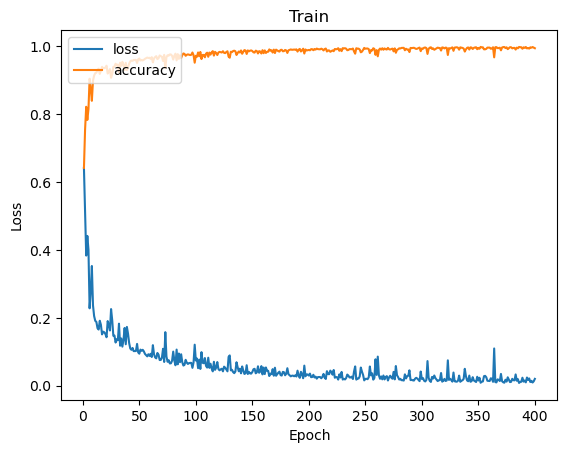

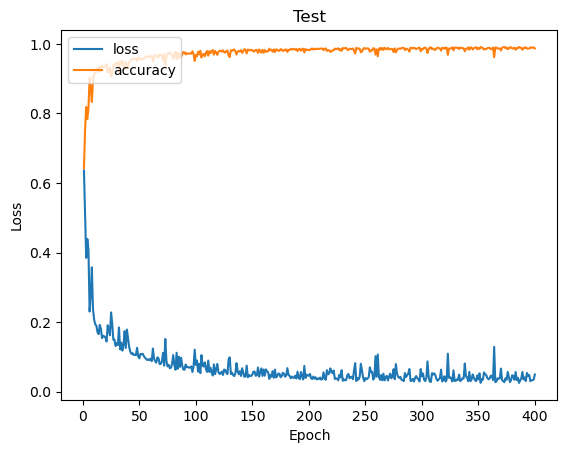

In [46]:
plot_graph(train_eva_df,'Train','Epoch','Loss',['loss','accuracy'])
plot_graph(test_eva_df,'Test','Epoch','Loss',['loss','accuracy'])

In [47]:
from IPython.display import clear_output

for x in range(200):
    print("\nEpoch: ",400+x+1)
    history = model.fit(X_train ,y_train ,batch_size=BATCH_SIZE ,epochs=1, verbose=2, shuffle=True, validation_split = 0.33)
    if history_dataframe.size == 0:
        history_dataframe = pd.DataFrame.from_dict(history.history)
    else:
        history_dataframe = pd.concat([history_dataframe,pd.DataFrame.from_dict(history.history)],axis=0,ignore_index=True)
    
    print("for training")
    train_eva.append(model.evaluate(X_train,y_train))
    print("for testing")
    test_eva.append(model.evaluate(X_test, y_test))
    
#     clear_output(wait=True)


Epoch:  401
127/127 - 10s - loss: 0.0056 - accuracy: 0.9979 - val_loss: 0.0351 - val_accuracy: 0.9913 - 10s/epoch - 82ms/step
for training
1512/1512 [==============================] - 18s 12ms/step - loss: 0.0163 - accuracy: 0.9954
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0463 - accuracy: 0.9875

Epoch:  402
127/127 - 10s - loss: 0.0162 - accuracy: 0.9938 - val_loss: 0.0439 - val_accuracy: 0.9861 - 10s/epoch - 82ms/step
for training
1512/1512 [==============================] - 18s 12ms/step - loss: 0.0241 - accuracy: 0.9913
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0503 - accuracy: 0.9853

Epoch:  403
127/127 - 11s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0219 - val_accuracy: 0.9928 - 11s/epoch - 87ms/step
for training
1512/1512 [==============================] - 18s 12ms/step - loss: 0.0080 - accuracy: 0.9975
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0281 - accuracy: 0.

1512/1512 [==============================] - 21s 14ms/step - loss: 0.0171 - accuracy: 0.9945
for testing
378/378 [==============================] - 6s 15ms/step - loss: 0.0468 - accuracy: 0.9881

Epoch:  426
127/127 - 13s - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.0429 - val_accuracy: 0.9876 - 13s/epoch - 98ms/step
for training
1512/1512 [==============================] - 20s 13ms/step - loss: 0.0207 - accuracy: 0.9936
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0468 - accuracy: 0.9874

Epoch:  427
127/127 - 16s - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0422 - val_accuracy: 0.9879 - 16s/epoch - 125ms/step
for training
1512/1512 [==============================] - 22s 15ms/step - loss: 0.0208 - accuracy: 0.9934
for testing
378/378 [==============================] - 5s 13ms/step - loss: 0.0431 - accuracy: 0.9871

Epoch:  428
127/127 - 12s - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0325 - val_accuracy: 0.9906 - 12s/epoch - 96ms/step
for tra

378/378 [==============================] - 4s 11ms/step - loss: 0.0300 - accuracy: 0.9912

Epoch:  450
127/127 - 12s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0255 - val_accuracy: 0.9921 - 12s/epoch - 92ms/step
for training
1512/1512 [==============================] - 18s 12ms/step - loss: 0.0093 - accuracy: 0.9972
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0291 - accuracy: 0.9917

Epoch:  451
127/127 - 12s - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0364 - val_accuracy: 0.9894 - 12s/epoch - 92ms/step
for training
1512/1512 [==============================] - 17s 11ms/step - loss: 0.0155 - accuracy: 0.9954
for testing
378/378 [==============================] - 4s 11ms/step - loss: 0.0395 - accuracy: 0.9880

Epoch:  452
127/127 - 12s - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0511 - val_accuracy: 0.9845 - 12s/epoch - 92ms/step
for training
1512/1512 [==============================] - 17s 11ms/step - loss: 0.0303 - accuracy: 0.9900
for tes

for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0100 - accuracy: 0.9970
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0352 - accuracy: 0.9896

Epoch:  475
127/127 - 7s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0268 - val_accuracy: 0.9920 - 7s/epoch - 57ms/step
for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0099 - accuracy: 0.9970
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0349 - accuracy: 0.9903

Epoch:  476
127/127 - 7s - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0237 - val_accuracy: 0.9928 - 7s/epoch - 57ms/step
for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0086 - accuracy: 0.9975
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0323 - accuracy: 0.9911

Epoch:  477
127/127 - 7s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0253 - val_accuracy: 0.9928 - 7s/epoch - 57ms/step
for traini

for training
1512/1512 [==============================] - 10s 7ms/step - loss: 0.0079 - accuracy: 0.9979
for testing
378/378 [==============================] - 3s 7ms/step - loss: 0.0297 - accuracy: 0.9917

Epoch:  500
127/127 - 9s - loss: 4.4122e-04 - accuracy: 0.9999 - val_loss: 0.0248 - val_accuracy: 0.9933 - 9s/epoch - 68ms/step
for training
1512/1512 [==============================] - 10s 7ms/step - loss: 0.0085 - accuracy: 0.9978
for testing
378/378 [==============================] - 3s 7ms/step - loss: 0.0309 - accuracy: 0.9912

Epoch:  501
127/127 - 9s - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0966 - val_accuracy: 0.9721 - 9s/epoch - 69ms/step
for training
1512/1512 [==============================] - 11s 8ms/step - loss: 0.0795 - accuracy: 0.9754
for testing
378/378 [==============================] - 3s 7ms/step - loss: 0.1106 - accuracy: 0.9701

Epoch:  502
127/127 - 9s - loss: 0.0223 - accuracy: 0.9920 - val_loss: 0.0237 - val_accuracy: 0.9915 - 9s/epoch - 68ms/step
for

for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0085 - accuracy: 0.9976
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0302 - accuracy: 0.9911

Epoch:  525
127/127 - 8s - loss: 6.1636e-04 - accuracy: 0.9999 - val_loss: 0.0218 - val_accuracy: 0.9940 - 8s/epoch - 60ms/step
for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0074 - accuracy: 0.9980
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0299 - accuracy: 0.9920

Epoch:  526
127/127 - 8s - loss: 4.0077e-04 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 0.9929 - 8s/epoch - 62ms/step
for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0088 - accuracy: 0.9976
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0332 - accuracy: 0.9915

Epoch:  527
127/127 - 8s - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0990 - val_accuracy: 0.9758 - 8s/epoch - 59ms/step
fo

378/378 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9924

Epoch:  549
127/127 - 8s - loss: 3.3874e-04 - accuracy: 0.9999 - val_loss: 0.0313 - val_accuracy: 0.9918 - 8s/epoch - 62ms/step
for training
1512/1512 [==============================] - 10s 6ms/step - loss: 0.0115 - accuracy: 0.9969
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0484 - accuracy: 0.9889

Epoch:  550
127/127 - 8s - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.0823 - val_accuracy: 0.9752 - 8s/epoch - 60ms/step
for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0686 - accuracy: 0.9776
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0975 - accuracy: 0.9726

Epoch:  551
127/127 - 8s - loss: 0.0142 - accuracy: 0.9948 - val_loss: 0.0232 - val_accuracy: 0.9919 - 8s/epoch - 60ms/step
for training
1512/1512 [==============================] - 9s 6ms/step - loss: 0.0095 - accuracy: 0.9970
for testing
378/3

1512/1512 [==============================] - 10s 6ms/step - loss: 0.0095 - accuracy: 0.9970
for testing
378/378 [==============================] - 2s 6ms/step - loss: 0.0361 - accuracy: 0.9893

Epoch:  574
127/127 - 8s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0229 - val_accuracy: 0.9933 - 8s/epoch - 61ms/step
for training
1512/1512 [==============================] - 10s 6ms/step - loss: 0.0082 - accuracy: 0.9977
for testing
378/378 [==============================] - 3s 7ms/step - loss: 0.0291 - accuracy: 0.9913

Epoch:  575
127/127 - 8s - loss: 9.4383e-04 - accuracy: 0.9998 - val_loss: 0.0237 - val_accuracy: 0.9933 - 8s/epoch - 64ms/step
for training
1512/1512 [==============================] - 10s 6ms/step - loss: 0.0086 - accuracy: 0.9975
for testing
378/378 [==============================] - 2s 7ms/step - loss: 0.0328 - accuracy: 0.9907

Epoch:  576
127/127 - 8s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0288 - val_accuracy: 0.9917 - 8s/epoch - 64ms/step
for training
151

378/378 [==============================] - 3s 7ms/step - loss: 0.0285 - accuracy: 0.9905

Epoch:  598
127/127 - 8s - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.1028 - val_accuracy: 0.9730 - 8s/epoch - 64ms/step
for training
1512/1512 [==============================] - 10s 7ms/step - loss: 0.0816 - accuracy: 0.9762
for testing
378/378 [==============================] - 3s 7ms/step - loss: 0.1114 - accuracy: 0.9721

Epoch:  599
127/127 - 8s - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0290 - val_accuracy: 0.9916 - 8s/epoch - 64ms/step
for training
1512/1512 [==============================] - 10s 7ms/step - loss: 0.0110 - accuracy: 0.9968
for testing
378/378 [==============================] - 4s 9ms/step - loss: 0.0389 - accuracy: 0.9892

Epoch:  600
127/127 - 9s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0227 - val_accuracy: 0.9934 - 9s/epoch - 68ms/step
for training
1512/1512 [==============================] - 10s 7ms/step - loss: 0.0082 - accuracy: 0.9976
for testing
378/378

In [49]:
test_eva_df['accuracy'].max()

0.9914020895957947

In [50]:
train_eva_df['accuracy'].max()

0.9974784851074219